In [1]:
import lightkurve as lk
import pandas as pd
from astropy.io import ascii
import numpy as np
from astropy import units as u
from astropy.units import cds
import glob

In [2]:
kic = 3427720
idx = 2

In [3]:
mal = pd.read_csv('../../data/malatium.csv', index_col=0)
star = mal.loc[idx]
kic = star.KIC
numax = star.numax
dnu = star.dnu

# Get the power spectrum
# Col1 = frequency in microHz, Col2 = psd
sfile = glob.glob('../../data/*{}*.pow'.format(kic))
data = ascii.read(sfile[0]).to_pandas()

# Read in the mode locs
cop = pd.read_csv('../../data/copper.csv',index_col=0)
locs = cop[cop.KIC == str(kic)].Freq.values
lo = locs.min() - .1*dnu
hi = locs.max() + .1*dnu

# Make the frequency range selection
ff, pp = data['col1'],data['col2']
sel = (ff > lo) & (ff < hi)
tf = ff[~sel].values
tp = pp[~sel].values


In [4]:
#Make extra accomodations for KIC 347720
if kic == 3427720:
    sel = (tf > 90.) & (tf < 400.)
    tf = tf[~sel]
    tp = tp[~sel]

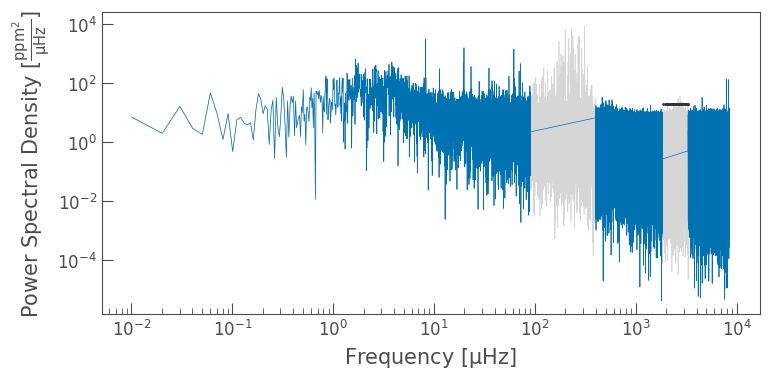

In [5]:
fpg = lk.Periodogram(ff.values*u.microhertz, pp.values*(cds.ppm**2/u.microhertz))
pg = lk.Periodogram(tf*u.microhertz, tp*(cds.ppm**2/u.microhertz))
ax = fpg.plot(scale='log', alpha=.2)
pg.plot(scale='log',ax=ax)
ax.scatter(locs, np.ones(len(locs))*20, s=1)

In [6]:
mal.loc[14]

KIC          6508366
Teff            6331
age           2.0582
dnu           51.553
eTeff             77
ednu           0.046
efeh             0.1
enumax           4.6
evsini           0.5
feh            -0.05
loage         0.1437
lomodlogg     0.0055
lomodmass      0.019
lomodrad       0.021
modlogg       3.9424
modmass       1.5279
modrad        2.1873
numax          958.3
source             L
upage         0.1278
upmodlogg     0.0066
upmodmass     0.0304
upmodrad       0.018
vsini           22.5
G            8.88212
bprp         0.64803
Name: 14, dtype: object